<img src='Image/CBG18.png' width="220px" align="right"> <img src='Image/uff-logo.png' width="200px" align="left"> <img src='Image/logon.jpg' width="200px" align="center"> 

### <center size=2> Real data example : Paraná Basin, Brazil <center> 
    

--------------------------------------------------------------------------------------------------------------------

In [1]:
#----------------------------- ALL INTERNAL PACKAGES --------------------------- #
import numpy as np
import ipywidgets as widgets
import scipy as sp
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from IPython.display import Latex
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import axes3d

# Geologia Regional e Contexto Geotectônico da Área de Estudo

> A Bacia do Paraná desenvolveu-se sobre uma área de escudo do continente Gondwana Sul e é composta por uma série de núcleos cratônicos, rodeados por vários cinturões móveis e cobertos por bacias molássicas, que foram desenvolvidas durante o ciclo termo-tectônico Brasiliano que se estendeu desde o neoproterozóico até o Ordoviciano. A deformação decorrente deste ciclo teve início entre 700 Ma e 650 Ma, sendo que a maior parte das intrusões de granitos que podemos observar na Bacia, situou-se dentro do limite entre o Proterozóico e o Paleozóico (cerca de 570 Ma) com resfriamento durante o Cambro-Ordoviciano entre 500-450 Ma (Zalan, 1987; Hawkesworth,2000).
>
> O embasamento que circunda a Bacia do Paraná é dividido em: margem Leste/Sudeste, representado pelas faixas Dom Feliciano e Ribeira ,de idade Brasiliana e de direção NE-SW, separados por um núcleo cratônico designado Rio de La Plata/ Luiz Alves; margem Norte/Nordeste, representada pela faixa Uruaçu, de idade mesoproterozóica, de direção NW e por dois maciços arqueanos (Guaxupé e Goiás) remobilizados durante o ciclo Brasiliano; margem Oeste/Noroeste representada pela faixa de dobramentos Paraguai/Araguaia, também do ciclo Brasiliano, que delimita o extremo da borda Noroeste da Bacia (Hawkesworth, 2000; Borghi, 2002) .
>
> Dentre os principais grupos de estruturas, nota-se três grupos de lineamentos de direções preferenciais NW-SE, E-W e NE-SW, representando cada um evento termo-tectônico distinto. O conjunto de lineamentos NW-SE são os mais antigos e estão relacionados ao evento  termo-tectônico do Transamazônico, e, as zonas de falhas geológicas associadas a este evento foram reativadas durante o rifteamento do Atlântico Sul, no Cretáceo.  Os lineamentos E-W, tiveram início a partir do Triássico e são paralelos às zonas de fratura oceânica, sugerindo uma ligação com o desenvolvimento do Atlântico Sul. Os lineamentos NE-SW são derivados do evento tremo-tectônico Brasiliano e de seus cinturões móveis associados. Este último conjunto de lineamentos é isento de diques de basalto (Milani, 1999). 
>
> O registro estratigráfico da Bacia do Paraná é formado por pacote sedimentar e magmático de espessura máxima em torno de 7000 m, que coincide geograficamente com o depocentro estrutural da sinéclise e com a calha do rio paraná (Milani,1998). O registro estratigráfico da Bacia do Paraná é dividido em seis unidades de ampla escala ou supersequências (Vail, 1977) na forma de pacotes rochosos com intervalos temporais de algumas dezenas de milhões de anos de duração e envelopados por superfícies de discordância de caráter inter-regional: Rio Ivaí (Ordoviciano-Siluriano), Paraná (Devoniano), Gondwana I (Carbonífero-Eotriássico), Gondwana II (Meso a Neotriássico), Gondwana III (Neojurássico-Eocretáceo) e Bauru (Neocretáceo). As três primeiras supersequências são representadas por sucessões sedimentares que definem ciclos transgressivos e regressivos ligados às oscilações do nível relativo do mar, durante o Paleozóico, ao passo que as demais correspondem a pacotes de sedimentos continentais com rochas ígneas associadas. As unidades formais da litoestratigrafia, quais sejam os grupos, formações e membros comumente utilizados na descrição do arranjo espacial dos estratos da bacia, inserem-se como elementos particularizados neste arcabouço aloestratigráfico de escala regional (boletim_2007).
>
> O mapa geológico-estrutural abaixo apresenta as formações aflorantes bem como as principais lineamentos e o Arco de Ponta Grossa e a localização da área de estudo.

  <img src='Image/Figure1revision.png' width="750px" align="center">

# Typical rock densities for Paraná Sedimentary Basin (Geology information)


|       Geological Formation       | Densities(g/cm³)| Depositions Cycles  |
|----------------------------------|-----------------|---------------------|
|Serra Geral                       |      2.80       |     Gondwana III    |
|Botucatu                          |      2.33       |     Gondwana III    | 
|Pirambóia                         |      2.47       |      Gondwana I     | 
|Rio do Rasto                      |      2.40       |      Gondwana I     |
|Teresina                          |      2.50       |      Gondwana I     |
|Irati                             |      2.60       |      Gondwana I     |
|Palermo                           |      2.55       |      Gondwana I     |
|Rio Bonito                        |      2.57       |      Gondwana I     |
|Taciba (Mb. Chapeo do Sol)        |      2.63       |      Gondwana I     |
|Campo Mourão                      |      2.60       |      Gondwana I     |
|Lagoa Azul (Mb. Taquaral)         |      2.63       |      Gondwana I     |
|Lagoa Azul (Mb. Cuiaba Paulista)  |      2.57       |      Gondwana I     |
|Ponta Grossa                      |      2.60       |        Paraná       |
|Furnas                            |      2.20       |        Paraná       |
|Vila Maria                        |      2.23       |       Rio Ivaí      |
|Embasamento                       |      2.75       |    Pré-Cambriano    |


# <center> Start coding from here on ! <center>

In [2]:
# ------------- Use pandas to read the real data -----------------:
names = ['Lat','Lon','mGal']
data = pd.read_csv( 'Real/Grav.txt', sep=',', names=names )
print(data)

               Lat        Lon      mGal
0       -23.737157 -53.401241  8.508879
1       -23.737165 -53.401241  8.508970
2       -23.737172 -53.401241  8.509061
3       -23.737179 -53.401241  8.509153
4       -23.737186 -53.401241  8.509244
5       -23.737194 -53.401241  8.509335
6       -23.737201 -53.401241  8.509426
7       -23.737208 -53.401241  8.509517
8       -23.737215 -53.401241  8.509608
9       -23.737222 -53.401241  8.509699
10      -23.737230 -53.401241  8.509790
11      -23.737237 -53.401241  8.509882
12      -23.737244 -53.401241  8.509973
13      -23.737251 -53.401241  8.510064
14      -23.737259 -53.401241  8.510155
15      -23.737266 -53.401241  8.510246
16      -23.737273 -53.401241  8.510337
17      -23.737280 -53.401241  8.510428
18      -23.737287 -53.401241  8.510520
19      -23.737295 -53.401241  8.510611
20      -23.737302 -53.401241  8.510702
21      -23.737309 -53.401241  8.510793
22      -23.737316 -53.401241  8.510884
23      -23.737324 -53.401241  8.510975


In [3]:
# ------------- Use pandas to read the topographic data -----------------:
names = ['Lat', 'Lon', 'Elev']
topo = pd.read_csv('Real/Topo.txt', sep=',', names=names)
print topo

               Lat        Lon        Elev
0       -23.737157 -53.401241  338.238342
1       -23.737165 -53.401241  338.217446
2       -23.737172 -53.401241  338.196551
3       -23.737179 -53.401241  338.175655
4       -23.737186 -53.401241  338.154759
5       -23.737194 -53.401241  338.133864
6       -23.737201 -53.401241  338.112968
7       -23.737208 -53.401241  338.092072
8       -23.737215 -53.401241  338.071176
9       -23.737222 -53.401241  338.050280
10      -23.737230 -53.401241  338.029384
11      -23.737237 -53.401241  338.008488
12      -23.737244 -53.401241  337.987592
13      -23.737251 -53.401241  337.966696
14      -23.737259 -53.401241  337.945800
15      -23.737266 -53.401241  337.924904
16      -23.737273 -53.401241  337.904007
17      -23.737280 -53.401241  337.883111
18      -23.737287 -53.401241  337.862214
19      -23.737295 -53.401241  337.841318
20      -23.737302 -53.401241  337.820421
21      -23.737309 -53.401241  337.799524
22      -23.737316 -53.401241  337

#  <center size=3> Some useful tools of pandas: <center>

In [4]:
# sum all data per column:
#data.sum()["Lat"]
data.sum()

Lat    -2.377206e+07
Lon    -5.562959e+07
mGal    1.461482e+06
dtype: float64

In [5]:
topo.sum()

Lat    -2.377200e+07
Lon    -5.562953e+07
Elev    3.841826e+08
dtype: float64

In [6]:
# get the min value per column:
data.min()

Lat    -24.259810
Lon    -54.343458
mGal   -18.536044
dtype: float64

In [7]:
topo.min()

Lat     -24.259810
Lon     -54.343458
Elev    227.531600
dtype: float64

In [8]:
# get the max value per column:
data.max()

Lat    -21.025533
Lon    -51.744631
mGal    16.177325
dtype: float64

In [9]:
topo.max()

Lat     -21.025533
Lon     -51.744631
Elev    739.263910
dtype: float64

#  <center size=3> Plot the spacial distribution of the real data set and the topography: <center>

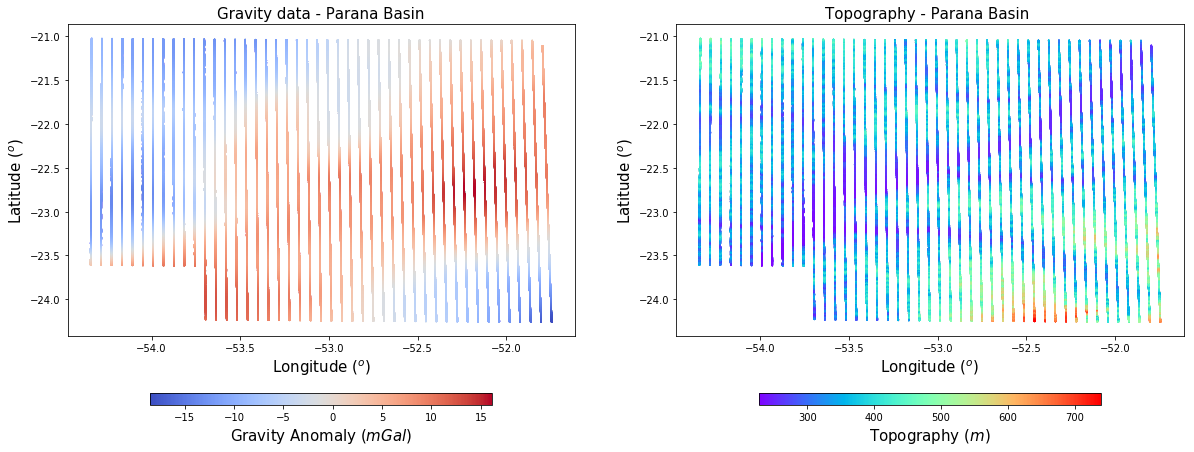

In [10]:
# ------------ plot the flight lines to check for the interpolation:--------#
# ------------ set figure size: ------------------------------------------#
plt.close('all')
fig = plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.title('Gravity data - Parana Basin',fontsize=15)
plt.xlabel('Longitude ($^o$)', fontsize = 15)
plt.ylabel('Latitude ($^o$)', fontsize = 15)
p1 = plt.scatter(data['Lon'], data['Lat'], s=1.0, c=data['mGal'], marker='.', cmap=plt.cm.coolwarm)
cbar = plt.colorbar(p1, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('Gravity Anomaly $ (mGal) $',fontsize=15, rotation = 0)

###########################################################################################################################

plt.subplot(1,2,2)
plt.title('Topography - Parana Basin ',fontsize=15)
plt.xlabel('Longitude ($^o$)', fontsize = 15)
plt.ylabel('Latitude ($^o$)', fontsize = 15)

p2 = plt.scatter(topo['Lon'], topo['Lat'], s=1.0, c=topo['Elev'], marker='.', cmap=plt.cm.rainbow)
cbar = plt.colorbar(p2, aspect=30, fraction = 0.03, orientation="horizontal")
cbar.set_label('Topography $ (m) $',fontsize=15,rotation = 0)

plt.show()

# <center size=3>  Create a mesh to plot the real data flight: <center> 

In [11]:
# set the mesh spacial boundaries from real data by means of pandas commands:
#latmin = data.min()['Lat']
latmin = data.min()[0]
print 'min latitude = ', latmin
#lonmin = data.min()['Lon']
lonmin = data.min()[1]
print 'min longitude =', lonmin
#latmax = data.max()["Lat"]
latmax = data.max()[0]
print 'max latitude =', latmax
#lonmax = data.max()["Lon"]
lonmax = data.max()[1]
print 'max longitude =', lonmax

# define the number of data in both latitude and longitude directions: 
nlat = 100  # 825 - numer of lines collected from factoration of total number of data flight.
nlon = 100  # 1271

# create a linspace for longitudes:
x = np.linspace(lonmin, lonmax, nlon)
# and for latitudes:
y = np.linspace(latmin, latmax, nlat)
# mesh for interpolation:
LON,LAT = np.meshgrid(x,y)

min latitude =  -24.259809557806697
min longitude = -54.343457667574604
max latitude = -21.0255330028869
max longitude = -51.7446306178909


# <center size=3>   Interpolation of flight data: <center> 

In [12]:
# convert lists to mnemonic arrays to perform calculations:
#lat = (data.iloc[:,0]) # latitude
#lon = (data.iloc[:,1]) # longitude
#gz =  (data.iloc[:,2]) # gz
#top = topo.iloc[:,3]) # elevation

# Columns names as identificators:
lat = ( data["Lat"] ) # latitude
lon = ( data["Lon"] ) # longitude
gz  = ( data["mGal"]) # gz
top = ( topo["Elev"]) # elevation
#print lat, lon, gz, top

In [13]:
flight_obs = (lon,lat) # real observation positions
grid_obs   = (LON,LAT) # interpolated observation positions

# function of scipy for interpolation:
gzi  = griddata(flight_obs, gz, grid_obs , method='cubic') # gravity data interpolated in grid_obs observations

In [14]:
topi = griddata(flight_obs, top, grid_obs , method='linear') # topographic data interpolated in grid_obs observations

# <center size=3> Plot of the interpolated data for verification: <center>

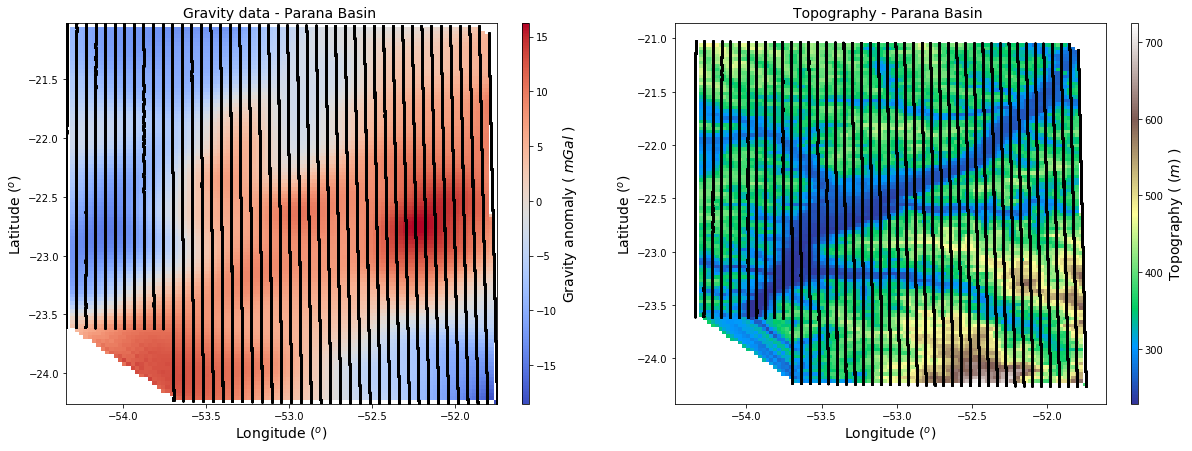

In [15]:
# ------------ set figure size: ------------------------------------------#
plt.close('all')
fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
fs = 14 # fontsize

# ------------ plot the flight lines to check for the interpolation:--------#
plt.scatter(data['Lon'], data['Lat'], s=1.0, c='black')

# ------------ plot the interpolated gravity anomaly in contourmap: -------#
plt.title('Gravity data - Parana Basin ', fontsize = fs)
image = plt.imshow(gzi, cmap=plt.cm.coolwarm,interpolation="none", aspect='auto',
                origin='lower',extent=[lonmin, lonmax, latmin, latmax])

# colobar specifications:
cbar1 = plt.colorbar(image, aspect=60, fraction = 0.1, orientation="vertical")
cbar1.set_label('Gravity anomaly ( $ mGal$ )',fontsize=fs, rotation = 90)
plt.xlabel('Longitude ($^o$)', fontsize = fs)
plt.ylabel('Latitude ($^o$)', fontsize = fs)

###########################################################################################################################

plt.subplot(1,2,2)

# ------------ plot the interpolated gravity anomaly in contourmap: -------#
plt.title('Topography - Parana Basin ', fontsize = fs)
i2 = plt.imshow(topi, cmap=plt.cm.terrain, interpolation="none", aspect='auto',
                origin='lower',extent=[lonmin, lonmax, latmin, latmax])

# ------------ plot the flight lines to check for the interpolation:--------#
plt.scatter(lon, lat, color='black', s=1.0)

# colobar specifications:
cbar2 = plt.colorbar(i2, aspect=60, fraction = 0.1, orientation="vertical")
cbar2.set_label('Topography ( $ (m)$ )',fontsize=fs, rotation = 90)
plt.xlabel('Longitude ($^o$)', fontsize = fs)
plt.ylabel('Latitude ($^o$)', fontsize = fs)

plt.show()

In [16]:
# ------------- copy the interpolated data into another array for convenience: -------------#
gzgrid = np.copy(gzi)
gzgrid = np.asarray(gzgrid)

topgrid = np.copy(topi)
topgrid = np.asarray(topgrid)
nx, ny = np.shape(topgrid)
print 'number of gridded points in longitude =', nx
print 'number of gridded points in latitude = ', ny

number of gridded points in longitude = 100
number of gridded points in latitude =  100


In [17]:
# ------------- Define the region where there is no flight lines (ONLY WORK FOR CORNES! - Corners exterminatior!): ---------#
i = np.where(x <= -53.6) #and np.where(x>= -52.5) # should be the interpolated positions!
j = np.where(y <= -23.5) #and np.where(y>= -22.5)
I,J = np.meshgrid(i,j)

# define nans for undesired regions: 
gzgrid[J,I] = np.nan
topgrid[J,I] = np.nan

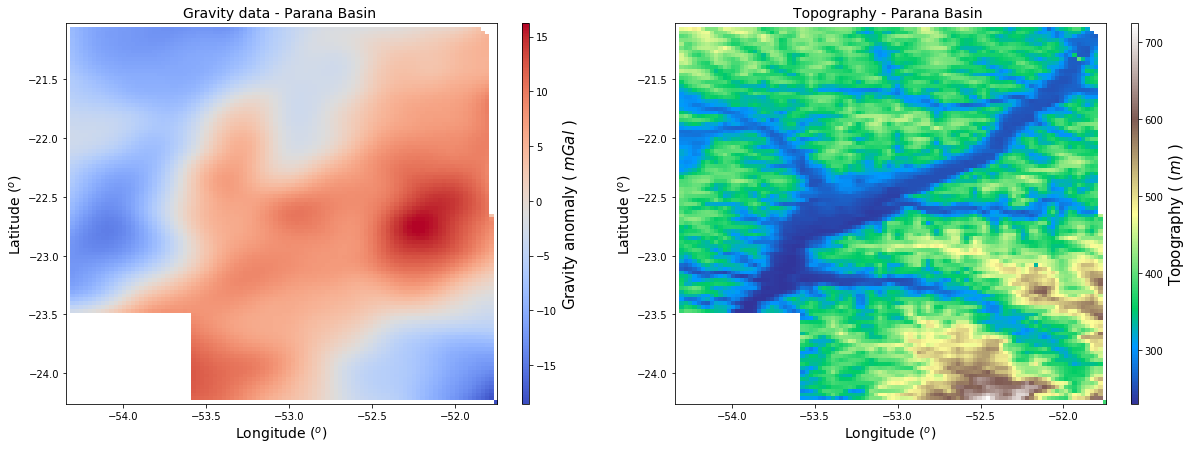

In [18]:
# ------------ set figure size: ------------------------------------------#
plt.close('all')
fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
fs = 14 # fontsize!!!!

# ------------ plot the interpolated gravity anomaly in contourmap: -------#
plt.title('Gravity data - Parana Basin ', fontsize = fs)
#p = plt.pcolormesh(LON, LAT, gzgrid, vmin= gz.min(), vmax = gz.max() )
p1 = plt.imshow(gzgrid, cmap=plt.cm.coolwarm,interpolation="none", aspect='auto',
                origin='lower',extent=[lonmin, lonmax, latmin, latmax])

# color bar specifications:
cbar1 = plt.colorbar(p1, aspect=60, fraction = 0.1, orientation="vertical")
cbar1.set_label('Gravity anomaly ( $ mGal$ )',fontsize=15, rotation = 90)
plt.xlabel('Longitude ($^o$)', fontsize = fs)
plt.ylabel('Latitude ($^o$)', fontsize = fs)       

###########################################################################################################################

plt.subplot(1,2,2)
# ------------ plot the interpolated gravity anomaly in contourmap: -------#
plt.title('Topography - Parana Basin ', fontsize = fs)
#p = plt.pcolormesh(LON, LAT, gzgrid, vmin= gz.min(), vmax = gz.max() )
p2 = plt.imshow(topgrid, cmap=plt.cm.terrain,interpolation="none", aspect='auto',
                origin='lower',extent=[lonmin, lonmax, latmin, latmax])

# color bar specifications:
cbar2 = plt.colorbar(p2, aspect=60, fraction = 0.1, orientation="vertical")
cbar2.set_label('Topography ( $ (m) $ )',fontsize=15, rotation = 90)
plt.xlabel('Longitude ($^o$)', fontsize = fs)
plt.ylabel('Latitude ($^o$)', fontsize = fs)       

plt.show()

# Delimiting a study region using Pandas commands:

In [19]:
# longitude filter:
target = data.loc[ (data['Lon']<= -52.1) & (data['Lon']>= -52.35) ] # should have the whitespace " LONG" !
# latitude filter:
target = target.loc[ (target['Lat']<= -22.6) & (target['Lat']>= -22.9) ]
# check if is right:
target.max(), target.min()

(Lat    -22.600004
 Lon    -52.118716
 mGal    16.177325
 dtype: float64, Lat    -22.899996
 Lon    -52.298149
 mGal    13.583061
 dtype: float64)

In [20]:
# INterpolate the desired data 
# set the mesh limits from real data with pandas command presented above:
#latmin = data.min()['Lat']
lat1 = target.min()[0]
print 'min target latitude = ', lat1
#lonmin = data.min()['Lon']
lon1 = target.min()[1]
print 'min target longitude =', lon1
#latmax = data.max()["Lat"]
lat2 = target.max()[0]
print 'max target latitude =', lat2
#lonmax = data.max()["Lon"]
lon2 = target.max()[1]
print 'max target longitude =', lon2

# create a linspace for filtered longitudes:
targ_lon = np.linspace(lon1, lon2, 100, endpoint=True)
# and for filtered latitudes:
targ_lat = np.linspace(lat1, lat2, 100, endpoint=True)
# mesh for interpolation:
targ_LON, targ_LAT = np.meshgrid(targ_lon, targ_lat)

min target latitude =  -22.8999960611137
min target longitude = -52.2981489231569
max target latitude = -22.600003834703802
max target longitude = -52.118715751673605


# <center> Perform interpolation of the target area : <center>

In [21]:
# working arrays for more clear code:
w1 = (np.array( target['Lon'] ), np.array( target['Lat']) )  # real coordinates
w2 = (targ_LON, targ_LAT) # interpolated coordinates
w3 = np.array( target['mGal'] ) # real gravity data
# function of scipy for interpolation:
targ_gzi = griddata( w1, w3 , w2, method='cubic')

In [22]:
print np.size(targ_gzi)

10000


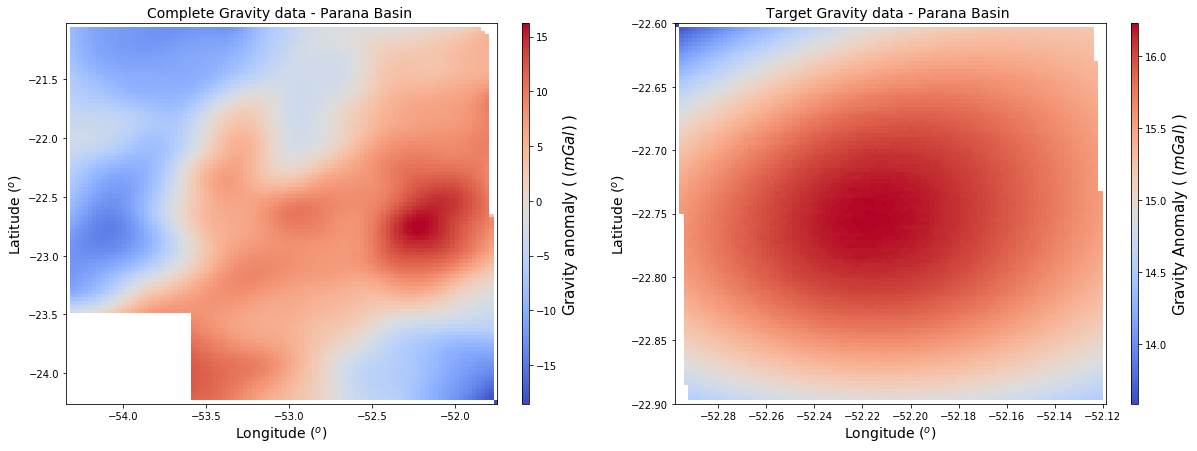

In [23]:
# ------------ set figure size: ------------------------------------------#
plt.close('all')
fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
fs = 14 # fontsize!!!!

# ------------ plot the interpolated gravity anomaly in contourmap: -------#
plt.title('Complete Gravity data - Parana Basin ', fontsize = fs)
#p = plt.pcolormesh(LON, LAT, gzgrid, vmin= gz.min(), vmax = gz.max() )
p1 = plt.imshow(gzgrid, cmap=plt.cm.coolwarm,interpolation="none", aspect='auto',
                origin='lower',extent=[lonmin, lonmax, latmin, latmax])

# color bar specifications:
cbar1 = plt.colorbar(p1, aspect=60, fraction = 0.1, orientation="vertical")
cbar1.set_label('Gravity anomaly ( $ (mGal) $ )',fontsize=15, rotation = 90)
plt.xlabel('Longitude ($^o$)', fontsize = fs)
plt.ylabel('Latitude ($^o$)', fontsize = fs)       

###########################################################################################################################

plt.subplot(1,2,2)
# ------------ plot the interpolated gravity anomaly in contourmap: -------#
plt.title('Target Gravity data - Parana Basin ', fontsize = fs)
#p = plt.pcolormesh(LON, LAT, gzgrid, vmin= gz.min(), vmax = gz.max() )
p2 = plt.imshow(targ_gzi, cmap=plt.cm.coolwarm,interpolation="none", aspect='auto',
                origin='lower',extent=[lon1, lon2, lat1, lat2])

# color bar specifications:
cbar2 = plt.colorbar(p2, aspect=60, fraction = 0.1, orientation="vertical")
cbar2.set_label('Gravity Anomaly ( $ (mGal) $ )',fontsize=15, rotation = 90)
plt.xlabel('Longitude ($^o$)', fontsize = fs)
plt.ylabel('Latitude ($^o$)', fontsize = fs)       

plt.show()

#  <center> Let's plot the maps into more realistic Cartographic projections?? <center> 

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-6049486.0355,-2767549.12762,-5760185.93167,-2379599.74391&bboxSR=3395&imageSR=3395&size=500,670&dpi=96&format=png32&f=image


/home/carreira/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/carreira/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/carreira/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/carreira/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


-52.2981489231569 -52.118715751673605 -22.8999960611137 -22.600003834703802


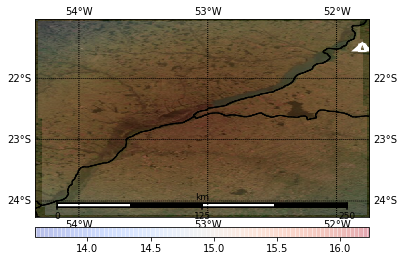

In [24]:
# ------------------------- Define the center of the map -----------------------------------#  
lon0 = 0.5*(lonmin + lonmax)
lat0 = 0.5*(latmin + latmax)

# ------- use basemap function to create the plot : ---------# 
m = Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,
            urcrnrlon=lonmax,urcrnrlat=latmax, 
            resolution='i',projection='tmerc', 
            lon_0=lon0, lat_0=lat0,epsg=3395)


#----------Drawing Lat Long: -------------#
m.drawmeridians(range(0,360,1), labels=[1, 1, 1, 1], latmax=lonmax)
m.drawparallels(range(-90,90,1), labels=[1, 1, 1, 1],latmax=latmax)

#------------------Loading Shapefiles---------------#
m.readshapefile('Real/shapes/Brasil', 'Brasil', drawbounds=True, linewidth=1)
m.readshapefile('Real/shapes/Mato Grosso do Sul', 'Mato Grosso do Sul', drawbounds=True, linewidth=1)
m.readshapefile('Real/shapes/Paraná', 'Paraná', drawbounds=True, linewidth=1)
m.readshapefile('Real/shapes/São Paulo', 'São Paulo', drawbounds=True, linewidth=1)

#--------------Background satellite image options-----------#

#m.shadedrelief(scale=1)
#m.etopo(scale=2)
#m.bluemarble(scale=0.5)
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 500, verbose= True)
#m.arcgisimage(service='World_Shaded_Relief layer', xpixels = 500, ypixels= 500, verbose= True)

#---------------- Scaling the map---------------#

m.drawmapscale(lon0, -24.07, lonmax, latmax, 250, barstyle='fancy')

#---------------- North Arrow-------------------#
LON=-51.8
LAT=-21.5
x,y = m(LON, LAT)
x2, y2 = m(LON+0.0,LAT+0.01)
plt.arrow(x,y,x2-x,y2-y,fc="w", ec="w", linewidth=8 ,head_width=1000, head_length=1000)

#------------------Anomaly map------------------#
k=m.imshow(targ_gzi, cmap=plt.cm.coolwarm, alpha=0.2,interpolation="none", aspect='auto', extent=[lon1, lon2, lat1, lat2], shape=[lon0,lat0],filternorm=10)  
m.colorbar(k, location='bottom', pad="5%")
print lon1, lon2, lat1, lat2
#-------------Add Title-----------------------#
#plt.title('Local anomaly and Terrain analysis')
plt.show()

# Proposed model for the region

In [25]:
# ------- define area for clicking in Lon, Lat, Rho and Z:
LonLat = [lon1, lon2, lat1, lat2]
RhoZ = [2700.0, 2850.0, -np.max(np.array(topo['Elev']) ), 7000.0]
print 'area RhoZ=',RhoZ
print 'area LonLat=',LonLat

area RhoZ= [2700.0, 2850.0, -739.26391020302, 7000.0]
area LonLat= [-52.2981489231569, -52.118715751673605, -22.8999960611137, -22.600003834703802]


# Use the click method for modeling with many masses:

In [26]:
# Importing external packages to perform modeling:
from modules.iplots import model_masses
from modules.sphere import sphere_gz

In [27]:
# Use basemap to convert coordinates from Lon, Lat to utmx, utmy (the gravity does only work with utm coordinates):
utmx, utmy = m( targ_LON, targ_LAT )

In [28]:
%matplotlib tk
x,y,z,rho = model_masses(LonLat, RhoZ, newclicks=None, dike=None)

In [29]:
print 'The following numbers should be the same =',  len(x), len(y), len(z), len(rho)

The following numbers should be the same = 300 300 300 300


In [30]:
#------- Calculating the gravity attraction for all point masses ----------:
# number of clicks:
nmasses = len(x)

gz_pred = 0.0
# loop for all masses:
for i in range( nmasses ):
    # cleanning list for putting the information of the i-th point mass:
    source=[]
    # calling basemap to convert the lon lat clicked coordinates into utm ones:
    a, b = m( x[i], y[i] )
    source = [ a, b, z[i], rho[i]/nmasses ]  # calling one source a time:
    #print source
    gz_pred += sphere_gz(utmx, utmy, -1800.0, source) # sum the effect of all masses

In [31]:
# ------------ set figure size: ------------------------------------------#
plt.close('all')
fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
fs = 14 # fontsize!!!!

# ------------ plot the interpolated gravity anomaly in contourmap: -------#
plt.title('Observed Gravity data (Parana Basin)  ', fontsize = fs)
#p = plt.pcolormesh(LON, LAT, gzgrid, vmin= gz.min(), vmax = gz.max() )
p1 = plt.imshow(targ_gzi, cmap=plt.cm.coolwarm,interpolation="none", aspect='auto',
                origin='lower',extent=[lon1, lon2, lat1, lat2])

# color bar specifications:
cbar1 = plt.colorbar(p1, aspect=60, fraction = 0.1, orientation="vertical")
cbar1.set_label('Gravity anomaly ( $ mGal$ )',fontsize=15, rotation = 90)
plt.xlabel('Longitude ($^o$)', fontsize = fs)
plt.ylabel('Latitude ($^o$)', fontsize = fs)       
###########################################################################################################################

plt.subplot(1,2,2)
# ------------ plot the interpolated gravity anomaly in contourmap: -------#
plt.title('Predicted Gravity data (model) ', fontsize = fs)
#p = plt.pcolormesh(LON, LAT, gzgrid, vmin= gz.min(), vmax = gz.max() )
p2 = plt.imshow(gz_pred, cmap=plt.cm.coolwarm, interpolation="none", aspect='auto',
                origin='lower',extent=[lon1, lon2, lat1, lat2])

# color bar specifications:
cbar2 = plt.colorbar(p2, aspect=60, fraction = 0.1, orientation="vertical")
cbar2.set_label('Gravity data ( $mGal$  )',fontsize=15, rotation = 90)
plt.xlabel('Longitude ($^o$)', fontsize = fs)
plt.ylabel('Latitude ($^o$)', fontsize = fs)       
plt.show()

## IF you need more clicks and want to keep the previous clicks, run the cells below:


In [32]:
# store previous clicks in the following list:
keep_clicks = (x,y,z,rho)
x,y,z,rho = model_masses(LonLat, RhoZ, newclicks=keep_clicks)

In [33]:
print len(x), len(y), len(z), len(rho)

306 306 306 306


In [34]:
#------- Calculating the gravity attraction for all point masses ----------:
# number of clicks:
nmasses = len(x)
gz_pred = 0.0
# loop for all masses:
for i in range( nmasses ):
    # cleanning list for putting the information of the i-th point mass:
    source=[]
    # calling basemap to convert the lon lat clicked coordinates into utm ones:
    a, b = m( x[i], y[i] )
    source = [ a, b, z[i], rho[i]]  # calling one source a time:
    #print source
    gz_pred += sphere_gz(utmx, utmy, -1800.0, source) # sum the effect of all masses

## <center> Plot the data with more clicks: <center>

In [35]:
# ------------ set figure size: ------------------------------------------#
plt.close('all')
fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
fs = 14 # fontsize!!!!

# ------------ plot the interpolated gravity anomaly in contourmap: -------#
plt.title('Observed Gravity data (Parana Basin)  ', fontsize = fs)
#p = plt.pcolormesh(LON, LAT, gzgrid, vmin= gz.min(), vmax = gz.max() )
p1 = plt.imshow(targ_gzi, cmap=plt.cm.coolwarm,interpolation="none", aspect='auto',
                origin='lower',extent=[lon1, lon2, lat1, lat2])

# color bar specifications:
cbar1 = plt.colorbar(p1, aspect=60, fraction = 0.1, orientation="vertical")
cbar1.set_label('Gravity anomaly ( $ mGal$ )',fontsize=15, rotation = 90)
plt.xlabel('Longitude ($^o$)', fontsize = fs)
plt.ylabel('Latitude ($^o$)', fontsize = fs)       
###########################################################################################################################

plt.subplot(1,2,2)
# ------------ plot the interpolated gravity anomaly in contourmap: -------#
plt.title('Predicted Gravity data (model) ', fontsize = fs)
#p = plt.pcolormesh(LON, LAT, gzgrid, vmin= gz.min(), vmax = gz.max() )
p2 = plt.imshow(gz_pred, cmap=plt.cm.coolwarm, interpolation="none", aspect='auto',
                origin='lower',extent=[lon1, lon2, lat1, lat2])

# color bar specifications:
cbar2 = plt.colorbar(p2, aspect=60, fraction = 0.1, orientation="vertical")
cbar2.set_label('Gravity data ( $mGal$  )',fontsize=15, rotation = 90)
plt.xlabel('Longitude ($^o$)', fontsize = fs)
plt.ylabel('Latitude ($^o$)', fontsize = fs)       
plt.show()

## <center> Plot the residuals between observed and predicted data: <center>

In [36]:
# ------- compute the difference between the "observed" data and the predicted data -------:
residuals = targ_gzi - gz_pred

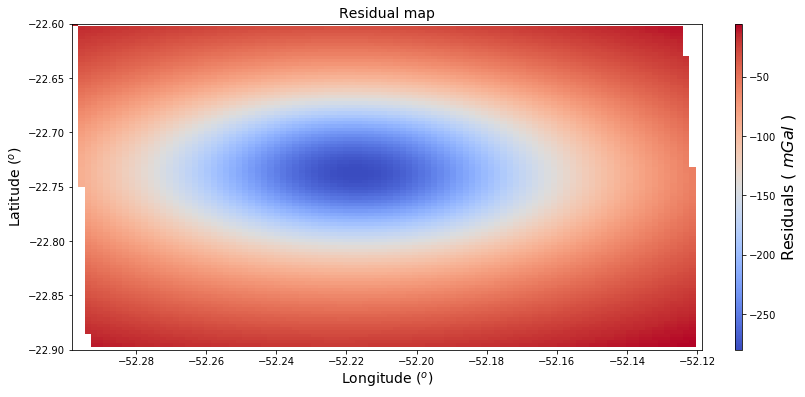

In [37]:
# Ploting the data to see if it's ok so far:
%matplotlib inline
plt.close('all')
fig = plt.figure(figsize=(12,6))
# adding axis to the figure:
ax = plt.axes()
fs = 14 # fontsize used in the labels

# plot the data in countor map:
plt.title('Residual map', fontsize = fs)
p = ax.imshow(residuals, cmap=plt.cm.coolwarm, interpolation="none", aspect='auto',
                origin='lower',extent=[lon1, lon2, lat1, lat2])
cbar = fig.colorbar(p, aspect = 50, fraction = 0.01, orientation="vertical")
cbar.set_label('Residuals ( $ mGal $ )',fontsize=16, rotation = 90)

plt.xlabel('Longitude ($^o$)', fontsize = fs)
plt.ylabel('Latitude ($^o$)', fontsize = fs)       

plt.show()

#  <center> 3D Plot of model and data-misfit in slice <center>

In [38]:
%matplotlib tk
plt.close('all')
py.rcParams['contour.negative_linestyle'] = 'dashed'
fig = plt.figure(figsize=(14,10))
ax = fig.gca(projection='3d') # 3D boxplot where the figure goes

# --- change size projection ---
#x_scale=1.
#y_scale=1.
#z_scale=1.
#scale=np.diag([x_scale, y_scale, z_scale, 1.0])
#scale=scale*(1.0/scale.max())
#scale[3,3]=1.0
#def short_proj():
#    return np.dot(Axes3D.get_proj(ax), scale)
#plt.get_proj=short_proj

# ----- define labels and limits of the plotbox:
ax.set_xlabel('UTM x ($m$)', labelpad=20 ,fontsize=fs)
ax.set_ylabel('UTM y ($m$)', labelpad=20 ,fontsize=fs)
ax.set_zlabel('Depth (m)',labelpad=20 ,fontsize=fs, rotation = 90)
#ax.set_xlim( lon1, lon2 )
#ax.set_ylim( lat1, lat2 )
ax.set_zlim(0.0,7000.0)
ax.set_title(' Model', fontsize=fs)
ax.view_init(70, 55)

# put z downward
ax.invert_zaxis()


p1 = ax.contour(utmx, utmy, gz_pred, 10, zdir='z', 
                offset=0.0, cmap='coolwarm', vmin = np.min(gz_pred), vmax = np.max(gz_pred) )
cbar1 = fig.colorbar(p1, aspect = 50, fraction = 0.01, orientation="vertical")
cbar1.set_label('Gravity Anomaly ( $ mGal $ )',fontsize=16, rotation = 90)

# ------------------- vertical gravitational atraction produced by the dike ------------------:
#p1 = ax.imshow(residuals, cmap=plt.cm.coolwarm, interpolation="none", aspect='auto',
#                origin='lower',extent=[lon1, lon2, lat1, lat2])
#cbar1 = fig.colorbar(p1, aspect = 50, fraction = 0.01, orientation="vertical")
#cbar1.set_label('Residuals ( $ mGal $ )',fontsize=16, rotation = 90)

# add the deep point mass here:
xc, yc = m(x,y) 
ax.scatter3D(xc, yc, z, s=rho , c='k', marker = '.')

plt.tight_layout(True)
plt.show()